In [1]:
# This notebook is dedicated to pinpointing what kinds of hacks are happening with different kinds of RMs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from debug_utils import load_all_hackdfs, highlight_differences
from statistics import mean, stdev
import matplotlib.pyplot as plt

/home/prasann/miniconda3/envs/rlenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2023-08-23 17:59:43,995] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [8]:
orig_hacks = load_all_hackdfs("../rm-attacks/attackouts/previous/")
adv_hacks = load_all_hackdfs("../rm-attacks/attackouts/reprodcheck/")
sanity = load_all_hackdfs("../rm-attacks/attackouts/")

In [9]:
def nohackrat(indf):
    nohack = indf[indf['diff']<0.001]
    return len(nohack)/len(indf)

def hacksteps(indf):
    hack = indf[indf['diff']>0.001]
    steps = [len(l) for l in hack['bestseqs']]
    return mean(steps)

def hackmean(indf):
    hack = indf[indf['diff']>0.001]
    return hack['diff'].mean()

def hackdf(indf):
    return indf[indf['diff']>0.001].copy()

def dmean(indf):
    return indf['diff'].mean()

In [10]:
print(nohackrat(orig_hacks['da_sft']))
print(nohackrat(orig_hacks['mix_sft']))
print(nohackrat(sanity['sft_sft']))

0.5
0.4696969696969697
0.45454545454545453


In [11]:
print(hacksteps(orig_hacks['da_sft']))
print(hacksteps(orig_hacks['mix_sft']))
print(hacksteps(sanity['sft_sft']))

1.7272727272727273
1.7714285714285714
1.8055555555555556


In [12]:
print(dmean(orig_hacks['da_sft']))
print(dmean(orig_hacks['mix_sft']))
print(dmean(sanity['sft_sft']))

0.09350585937424243
0.13963745579848483
0.0867896802530303


(array([14.,  7.,  3.,  2.,  2.,  0.,  2.,  1.,  1.,  1.]),
 array([0.00390625, 0.08251953, 0.16113281, 0.23974609, 0.31835938,
        0.39697266, 0.47558594, 0.55419922, 0.6328125 , 0.71142578,
        0.79003906]),
 <BarContainer object of 10 artists>)

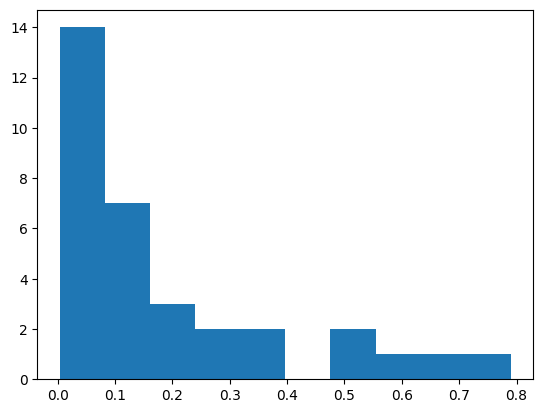

In [13]:
# DA RM 
plt.hist(hackdf(orig_hacks['da_sft'])['diff'])

(array([14.,  8.,  2.,  1.,  1.,  3.,  0.,  1.,  3.,  2.]),
 array([0.00613403, 0.09599915, 0.18586426, 0.27572937, 0.36559448,
        0.45545959, 0.54532471, 0.63518982, 0.72505493, 0.81492004,
        0.90478516]),
 <BarContainer object of 10 artists>)

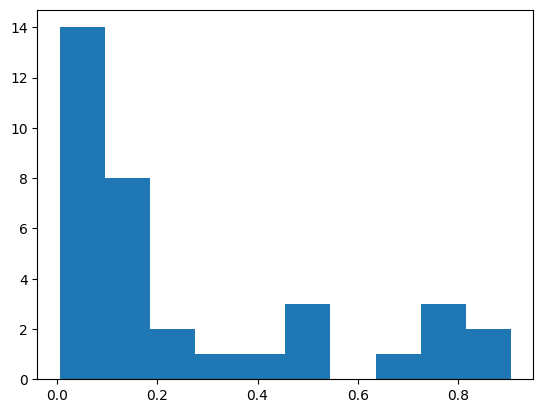

In [14]:
# Mix RM 
plt.hist(hackdf(orig_hacks['mix_sft'])['diff'])

(array([26.,  3.,  3.,  1.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([0.01660156, 0.1296875 , 0.24277344, 0.35585937, 0.46894531,
        0.58203125, 0.69511719, 0.80820313, 0.92128906, 1.034375  ,
        1.14746094]),
 <BarContainer object of 10 artists>)

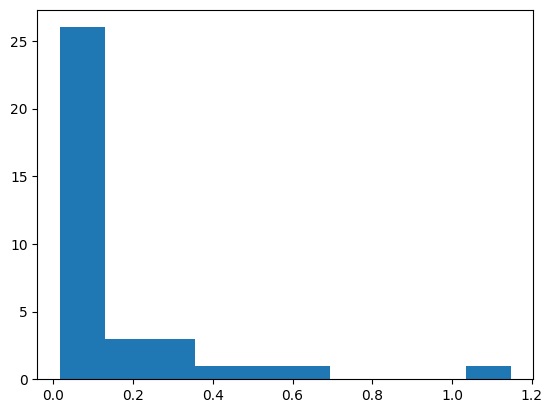

In [15]:
# Orig (Retrained) RM 
plt.hist(hackdf(sanity['sft_sft'])['diff'])

In [16]:
def diff_ind(indf, ind):
    row = hackdf(indf).iloc[ind]
    print(len(row.bestseqs), " step(s)")
    print(row.origsco)
    print(row.maxsco)
    highlight_differences(row.origseq, row.bestseqs[-1])

In [18]:
for i in range(0, 10):
    print("___________________________________")
    diff_ind(orig_hacks['mix_sft'], i)

___________________________________
1  step(s)
0.5263671875
0.568359375


___________________________________
4  step(s)
0.3107910156
0.6748046875


___________________________________
2  step(s)
0.1983642578
0.26171875


___________________________________
1  step(s)
-0.039642334
-0.0335083008


___________________________________
1  step(s)
1.1181640625
1.126953125


___________________________________
2  step(s)
1.4814453125
1.599609375


___________________________________
2  step(s)
1.4609375
1.6435546875


___________________________________
2  step(s)
0.7158203125
1.25


___________________________________
4  step(s)
0.8349609375
1.60546875


___________________________________
1  step(s)
0.47265625
0.5634765625


In [15]:
# more stuff, specifically we are trying to see if the adversarial models are actually helpful

In [16]:
adv_hacks = load_all_hackdfs("../rm-attacks/attackouts/reprodcheck/")

In [20]:
adv_hacks['advdaboth']['diff'].mean()

0.19390857716197915

In [21]:
origdf = pd.read_json("../outputs/augdata/augstackv1.jsonl", orient='records', lines=True)

In [22]:
origdf

,question,response_j,response_k
0,Following code:\n\n```\nmodule MyServerAPI\n ...,I imagine it should ([\n\n```\n raise BaseExc...,I imagine it should be\n\n```\n raise BaseExc...
1,What advantages did the founding fathers see i...,"One element overrode everything else, and it ...","One element overrode everything else, and it ..."
2,I would like to do if else statement for Spinn...,"Try this:\n\nAdd array like ""Select Month"",""j...","Try this:\n\nAdd array like ""Select Month"",""j..."
3,"I'm developing an iPhone app. In a label, I wa...",(2014-07-24: Currently accepted answer is not...,(2014-07-24: Currently accepted answer is not...
4,"For example: Fannie Mae went up ~20% today, Fe...","At any moment, the price is where the supply ...","At any moment, the price is where the supply ..."
...,...,...,...
4779,I'm writing a monitoring service that uses WMI...,"The following works on Window 2003 R2 SP 2, W...","The following works on Window 2003 R2 SP 2, W..."
4780,DOMNodeInserted is known to make dynamic pages...,One new alternative that @naugtur briefly men...,New new alternative that @naugtur briefly men...
4781,```css\n.rectangle {\r\n width: 420px;\r\n ...,use `font-size:0` to parent element,(` ` Pérez-size:0` to parent element
4782,I'm loading a bunch of UIImages (that are loca...,[`imageNamed:`](http://developer.apple.com/li...,[`imageNamed:`](http://developer.apple.com/li...
